In [1]:
from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Sun, Earth, Jupiter
from poliastro.frames import Planes
from poliastro.ephem import Ephem
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.util import time_range, norm

/home/fbrunodr/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


([<matplotlib.lines.Line2D at 0x7fc873e0b190>],
 <matplotlib.lines.Line2D at 0x7fc873e087c0>)

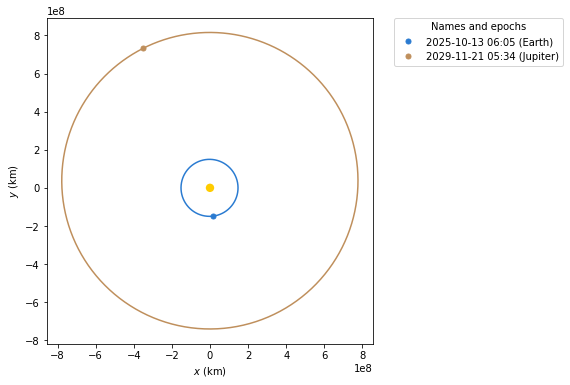

In [2]:
T0 = Time("J2000", scale="tdb") + 9416.75350638 * u.day
t1 = T0 + 1499.97848565 * u.day

plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, T0, label="Earth")
plotter.plot_body_orbit(Jupiter, t1, label="Jupiter")

In [3]:
# Ephemerides
earth = Ephem.from_body(Earth, time_range(T0, end=t1), plane=Planes.EARTH_ECLIPTIC)
jupiter = Ephem.from_body(Jupiter, time_range(T0, end=t1), plane=Planes.EARTH_ECLIPTIC)

In [4]:
# First maneuver
ship = Orbit.from_ephem(Sun, earth, T0)
jupiter_orbit = Orbit.from_ephem(Sun, jupiter, t1)

first_maneuver = Maneuver.lambert(ship, jupiter_orbit)[0]
print(norm(first_maneuver[1].to(u.km / u.s)))
first_trajectory = ship.apply_maneuver([first_maneuver])
first_trajectory = Ephem.from_orbit(first_trajectory, time_range(T0, end=t1), plane=Planes.EARTH_ECLIPTIC)

9.485756175624388 km / s


([<matplotlib.lines.Line2D at 0x7fc86f9af550>], None)

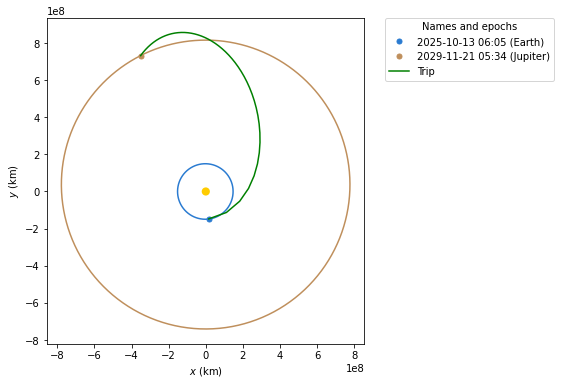

In [5]:
plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, T0, label="Earth")
plotter.plot_body_orbit(Jupiter, t1, label="Jupiter")

plotter.plot_ephem(first_trajectory, label="Trip", color='green')